## Feature Selection with Filtering Method | Constant, Quasi Constant and Duplicate Feature Removal

Unnecessary and redundant features not only slow down the training time of an algorithm, but they also affect the performance of the algorithm.

There are several advantages of performing feature selection before training machine learning models:
- Models with less number of features have higher explainability
- It is easier to implement machine learning models with reduced features
- Fewer features lead to enhanced generalization which in turn reduces overfitting
- Feature selection removes data redundancy
- Training time of models with fewer features is significantly lower
- Models with fewer features are less prone to errors

### What is filter method? 

Features selected using filter methods can be used as an input to any machine learning models.

- Univariate -> Fisher Score, Mutual Information Gain, Variance etc
- Multi-variate -> Pearson Correlation

The univariate filter methods are the type of methods where individual features are ranked according to specific criteria. The top N features are then selected. Different types of ranking criteria are used for univariate filter methods, for example fisher score, mutual information, and variance of the feature.

Multivariate filter methods are capable of removing redundant features from the data since they take the mutual relationship between the features into account.

### Univariate Filtering Methods in here

- Constant Removal
- Quasi Constant Removal
- Duplicate Feature Removal

### Constant Feature Removal 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [ ]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

In [ ]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Constant Features Removal 

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
constant_filter.get_support().sum()

291

In [ ]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [ ]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [ ]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

### Quasi constant feature removal 

In [ ]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [ ]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [ ]:
quasi_constant_filter.get_support().sum()

245

In [ ]:
291-245

46

In [ ]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [ ]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 245), (4000, 245))

In [ ]:
370-245

125

### Remove Duplicate Features 

In [ ]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [ ]:
type(X_train_T)

numpy.ndarray

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [ ]:
X_train_T.duplicated().sum()

18

In [ ]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [ ]:
features_to_keep = [not index for index in duplicated_features]

In [ ]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

In [ ]:
370-227

143

### Build ML model and compare the performance of the selected feature 

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 2.18 s


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 2.87 s


## Feature Selection with Filtering Method- Correlated Feature Removal

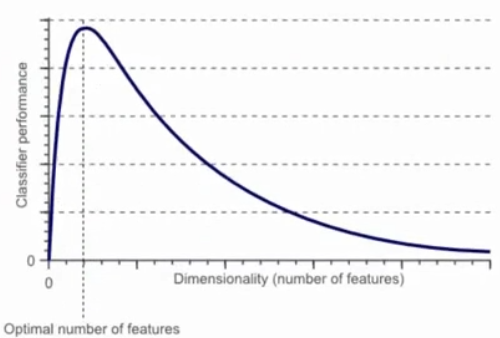

A dataset can also contain correlated features. Two or more than two features are correlated if they are close to each other in the linear space.

Correlation between the output observations and the input features is very important and such features should be retained

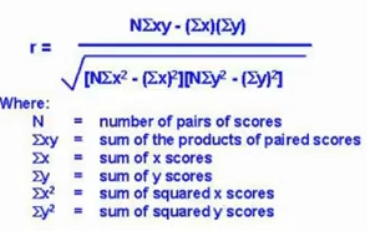

#### Summary 

- Feature Space to target correlation is desired
- Feature to feature correlation is not desired
- If 2 features are highly correlated then either feature is redundant
- Correlation in feature space increases model complexity
- Removing correlated features improves model performance
- Different model shows different performance over the correlated features

In [ ]:
corrmat = X_train_unique.corr()

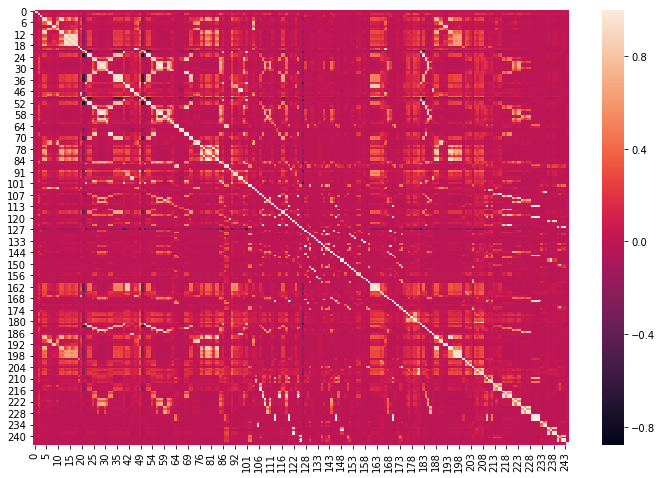

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [ ]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features = get_correlation(X_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [ ]:
len(corr_features)

124

In [ ]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

In [ ]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 912 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 1.53 s


### Feature Grouping and Feature Importance 

In [ ]:
corrmat

0         1         2         3         4         5         6    \
0    1.000000 -0.025277 -0.001942  0.003594  0.004054 -0.001697 -0.015882   
1   -0.025277  1.000000 -0.007647  0.001819  0.008981  0.009232  0.001638   
2   -0.001942 -0.007647  1.000000  0.030919  0.106245  0.109140  0.048524   
3    0.003594  0.001819  0.030919  1.000000  0.029418  0.024905  0.014513   
4    0.004054  0.008981  0.106245  0.029418  1.000000  0.888789  0.381632   
5   -0.001697  0.009232  0.109140  0.024905  0.888789  1.000000  0.363680   
6   -0.015882  0.001638  0.048524  0.014513  0.381632  0.363680  1.000000   
7   -0.019807  0.001746  0.055708  0.013857  0.341266  0.384820  0.908158   
8    0.000956  0.000614  0.004040 -0.000613  0.012927  0.017671  0.030397   
9   -0.000588  0.000695  0.005796 -0.000691  0.019674  0.030060  0.036359   
10  -0.012443  0.001517  0.042368  0.012451  0.298916  0.280081  0.805265   
11   0.010319  0.009097  0.096719  0.026377  0.938409  0.824893  0.038751   
12   0.005268  0.009360  0.098070  0.021968  0.838953  0.943622  0.067664   
13   0.017605 -0.002511  0.082025  0.016331  0.266746  0.254702  0.040788   
14   0.016960 -0.001086  0.095485  0.016458  0.326051  0.359897  0.048914   
15   0.018040  0.002426  0.106415  0.024014  0.638412  0.565620  0.043920   
16   0.017400 -0.002401  0.081028  0.015979  0.263482  0.252160  0.043357   
17   0.016745 -0.001019  0.095009  0.016239  0.324417  0.358769  0.051373   
18   0.015206  0.002629  0.110912  0.025558  0.673593  0.599584  0.190138   
19  -0.000103  0.000519  0.016886 -0.000520  0.049579  0.042621  0.012454   
20  -0.001198  0.004590  0.107680  0.007478  0.227803  0.238159  0.306165   
21  -0.006814 -0.008975 -0.105502 -0.002101 -0.208030 -0.211873 -0.071459   
22  -0.002037  0.041015 -0.102487  0.017541  0.041167  0.041372 -0.006549   
23   0.010356  0.008019  0.107570  0.003429  0.200514  0.182937  0.035401   
24   0.012021  0.007439  0.101605  0.004843  0.220673  0.201909  0.039018   
25   0.001732  0.011525  0.273152  0.010099  0.027387  0.026378  0.046258   
26   0.001138  0.009467  0.231649  0.015117  0.033757  0.037053  0.044225   
27  -0.004836  0.009771  0.299165  0.036569 -0.010411 -0.013701  0.020327   
28  -0.006480  0.008796  0.241707  0.040420 -0.012628 -0.018755  0.009992   
29  -0.005811  0.008676  0.237830  0.041165 -0.012035 -0.018146  0.010326   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.006937  0.002152  0.043278  0.002314  0.073627  0.084908  0.009789   
216  0.004924  0.002210  0.045622  0.003234  0.086904  0.093401  0.042081   
217  0.008100  0.003979  0.149586  0.001554 -0.003401 -0.004867  0.024589   
218 -0.000582  0.002581  0.093124 -0.001262 -0.007050 -0.006547 -0.002282   
219  0.007130  0.004811  0.178546  0.002540 -0.002079 -0.004782  0.036168   
220  0.007675  0.004879  0.179565  0.002948 -0.001151 -0.003808  0.038964   
221 -0.006477  0.005759  0.178263 -0.005438  0.002963 -0.001631  0.048470   
222 -0.010219  0.003183  0.094741 -0.003083  0.040691  0.027749  0.133603   
223 -0.011386  0.006355  0.200415  0.025778 -0.000914 -0.005809  0.038767   
224 -0.011200  0.006248  0.195652  0.033042 -0.000322 -0.005729  0.043137   
225  0.006455  0.002629  0.125618 -0.001532  0.003267  0.004018  0.013532   
226  0.008361  0.001482  0.059293  0.000238  0.012429  0.010896  0.001034   
227  0.003765  0.002827  0.135362 -0.001817  0.000824  0.001493  0.012108   
228  0.005352  0.002770  0.132537 -0.001698  0.001272  0.001627  0.010082   
229  0.008042  0.000356  0.023435 -0.000354 -0.001629 -0.001719 -0.000318   
230  0.007870  0.000338  0.022679 -0.000338 -0.001669 -0.001713 -0.000302   
231  0.007952  0.000411  0.025362 -0.000285 -0.001677 -0.001846 -0.000365   
232  0.008021  0.000408  0.025406 -0.000334 -0.001730 -0.001875 -0.000362   
233 -0.001596  0.000391  0.013612 -0.000391 -0.001930 -0.001981 -0.000349   
234  0.001830  0.000453  0.023446  0.008469  0.000833 -0.000407 -0.000404   
235 -0

In [ ]:
corrdata = corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
     5      0.001697
     6      0.015882
     7      0.019807
     8      0.000956
     9      0.000588
     10     0.012443
     11     0.010319
     12     0.005268
     13     0.017605
     14     0.016960
     15     0.018040
     16     0.017400
     17     0.016745
     18     0.015206
     19     0.000103
     20     0.001198
     21     0.006814
     22     0.002037
     23     0.010356
     24     0.012021
     25     0.001732
     26     0.001138
     27     0.004836
     28     0.006480
     29     0.005811
              ...   
244  215    0.000338
     216    0.000244
     217    0.017276
     218    0.006644
     219    0.018092
     220    0.017579
     221    0.014736
     222    0.002052
     223    0.014980
     224    0.014628
     225    0.014567
     226    0.005688
     227    0.015351
     228    0.014485
     229    0.013197
     230    0.012842
     231    0

In [ ]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
181  181    1.000000e+00
159  159    1.000000e+00
160  160    1.000000e+00
161  161    1.000000e+00
162  162    1.000000e+00
163  163    1.000000e+00
164  164    1.000000e+00
165  165    1.000000e+00
166  166    1.000000e+00
167  167    1.000000e+00
168  168    1.000000e+00
169  169    1.000000e+00
170  170    1.000000e+00
171  171    1.000000e+00
158  158    1.000000e+00
173  173    1.000000e+00
174  174    1.000000e+00
175  175    1.000000e+00
176  176    1.000000e+00
177  177    1.000000e+00
183  183    1.000000e+00
178  178    1.000000e+00
179  179    1.000000e+00
180  180    1.000000e+00
172  172    1.000000e+00
                ...     
113  60     8.925381e-06
60   113    8.925381e-06
82   193    8.892757e-06
193  82     8.892757e-06
230  110    8.848510e-06
110  230    8.848510e-06
235  15     8.707147e-06
15   235    8.707147e-06
186  243    7.715459e-06


In [ ]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
62   31     1.000000
20   47     1.000000
47   20     1.000000
52   23     1.000000
23   52     1.000000
53   24     1.000000
24   53     1.000000
33   69     1.000000
69   33     1.000000
157  133    1.000000
133  157    1.000000
237  149    1.000000
149  237    1.000000
154  132    1.000000
132  154    1.000000
146  230    0.999997
230  146    0.999997
238  122    0.999945
122  238    0.999945
148  149    0.999929
149  148    0.999929
237  148    0.999929
148  237    0.999929
231  232    0.999892
232  231    0.999892
              ...   
183  52     0.860163
52   183    0.860163
183  23     0.860163
23   183    0.860163
79   195    0.859806
195  79     0.859806
8    193    0.859270
193  8      0.859270
29   61     0.858830
61   29     0.858830
     58     0.858830
58   61     0.858830
84   77     0.858529
77   84     0.858529
83   189    0.858484
189  83     0.858484
84   194    0

In [ ]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

features1  features2  corr_value
0          143        135    1.000000
1          135        143    1.000000
2          136        128    1.000000
3          128        136    1.000000
4           31         62    1.000000
5           62         31    1.000000
6           20         47    1.000000
7           47         20    1.000000
8           52         23    1.000000
9           23         52    1.000000
10          53         24    1.000000
11          24         53    1.000000
12          33         69    1.000000
13          69         33    1.000000
14         157        133    1.000000
15         133        157    1.000000
16         237        149    1.000000
17         149        237    1.000000
18         154        132    1.000000
19         132        154    1.000000
20         146        230    0.999997
21         230        146    0.999997
22         238        122    0.999945
23         122        238    0.999945
24         148        149    0.999929
25         149        148    0.999929
26         237        148    0.999929
27         148        237    0.999929
28         231        232    0.999892
29         232        231    0.999892
..         ...        ...         ...
504        183         52    0.860163
505         52        183    0.860163
506        183         23    0.860163
507         23        183    0.860163
508         79        195    0.859806
509        195         79    0.859806
510          8        193    0.859270
511        193          8    0.859270
512         29         61    0.858830
513         61         29    0.858830
514         61         58    0.858830
515         58         61    0.858830
516         84         77    0.858529
517         77         84    0.858529
518         83        189    0.858484
519        189         83    0.858484
520         84        194    0.857731
521        194         84    0.857731
522         76        190    0.857717
523        190         76    0.857717
524        151        173    0.854991
525        173        151    0.854991
526         41        163    0.852233
527        163         41    0.852233
528         66         67    0.851384
529         67         66    0.851384
530         61         28    0.851022
531         28         61    0.851022
532         72         35    0.850893
533         35         72    0.850893

[534 rows x 3 columns]

In [ ]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [ ]:
len(correlated_groups_list)

56

In [ ]:
X_train.shape, X_train_uncorr.shape

((16000, 370), (16000, 103))

In [ ]:
for group in correlated_groups_list:
    print(group)

   features1  features2  corr_value
0        143        135         1.0
     features1  features2  corr_value
2          136        128    1.000000
197        136        169    0.959468
   features1  features2  corr_value
4         31         62         1.0
   features1  features2  corr_value
6         20         47         1.0
     features1  features2  corr_value
8           52         23    1.000000
297         52         24    0.927683
299         52         53    0.927683
448         52         21    0.877297
505         52        183    0.860163
     features1  features2  corr_value
12          33         69    1.000000
224         33         32    0.947113
228         33         68    0.946571
322         33         26    0.917665
337         33         55    0.914178
422         33        184    0.884383
    features1  features2  corr_value
14        157        133         1.0
    features1  features2  corr_value
16        237        149    1.000000
26        237        148    

### Feature Importance based on tree based classifiers 

In [ ]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)
    

In [ ]:
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64, features      128.000000
 importance      0.563757
 Name: 1, dtype: float64, features      62.00
 importance     0.51
 Name: 1, dtype: float64, features      47.00
 importance     0.51
 Name: 1, dtype: float64, features      183.000000
 importance      0.285817
 Name: 5, dtype: float64, features      184.00000
 importance      0.34728
 Name: 6, dtype: float64, features      157.00
 importance      0.34
 Name: 0, dtype: float64, features      148.000000
 importance      0.505844
 Name: 2, dtype: float64, features      132.00
 importance      0.39
 Name: 1, dtype: float64, features      120.000000
 importance      0.749683
 Name: 6, dtype: float64, features      122.00
 importance      0.34
 Name: 1, dtype: float64, features      82.000000
 importance     0.518827
 Name: 0, dtype: float64, features      125.000000
 importance      0.940524
 Name: 3, dtype: float64, features      197.000000
 importance      0.289727
 Na

In [ ]:
important_features = pd.DataFrame(important_features)

In [ ]:
important_features.reset_index(inplace=True, drop = True)

In [ ]:
important_features

features  importance
0      135.0    0.510000
1      128.0    0.563757
2       62.0    0.510000
3       47.0    0.510000
4      183.0    0.285817
5      184.0    0.347280
6      157.0    0.340000
7      148.0    0.505844
8      132.0    0.390000
9      120.0    0.749683
10     122.0    0.340000
11      82.0    0.518827
12     125.0    0.940524
13     197.0    0.289727
14     207.0    0.312834
15      17.0    0.286833
16     243.0    0.431557
17     185.0    0.391367
18     182.0    0.432045
19      95.0    0.487162
20      84.0    0.299008
21     221.0    0.285550
22       8.0    0.345509
23     228.0    0.434186
24     117.0    0.517013
25      49.0    0.500161
26     100.0    0.386775
27     191.0    0.345104
28      34.0    0.283901
29      15.0    0.400677
30     107.0    0.349126
31      61.0    0.323735
32      41.0    0.386338
33     102.0    0.508955
34     189.0    0.229269
35      72.0    0.490102
36      60.0    0.500520
37      79.0    0.213903
38     234.0    0.445719
39     104.0    0.640915
40     179.0    0.634779
41     151.0    0.510000
42     161.0    0.346426
43       5.0    0.356386
44       5.0    0.403831
45      93.0    0.544349
46     121.0    0.510000
47      87.0    0.553622
48     174.0    0.743723
49      50.0    0.616659
50       7.0    0.545702
51      87.0    0.746200
52      86.0    0.447693
53     153.0    0.510000
54     151.0    0.510000
55      66.0    0.630293

In [ ]:
features_to_consider = set(important_features['features'])

In [ ]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [ ]:
features_to_discard = list(features_to_discard)

In [ ]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis = 1)
X_train_grouped_uncorr.shape

(16000, 140)

In [ ]:
X_test_grouped_uncorr = X_test_unique.drop(labels=features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 140)

In [ ]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy on test set: 
0.95775
Wall time: 1.01 s


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 1.48 s


In [ ]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 891 ms


## Feature Selection Based on Univariate ROC_AUC for Classification and MSE for Regression 

### What is ROC_AUC 

The Receiver Operator Characteristic (ROC) curve is well-known in evaluating classification performance. Owing to its superiority in dealing with imbalanced and cost-sensitive data, the ROC curve has been exploited as a popular metric to evaluate ML models.

The ROC curve and AUC (area under the ROC curve) have been widely used to determine the classification accuracy in supervised learning.

It is basically used in Binary Classification

### Use of ROC_AUC in Classification Problem 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [ ]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [ ]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove Constant, Quasi Constant and Duplicate Features

In [ ]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [ ]:
370-245

125

In [ ]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

18

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

####  Now calculate ROC_AUC Score

In [ ]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [ ]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [ ]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending =False, inplace = True)

In [ ]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
236    0.500000
80     0.500000
89     0.500000
88     0.500000
87     0.500000
86     0.500000
85     0.500000
84     0.500000
83     0.500000
82     0.500000
81     0.500000
78     0.500000
79     0.500000
92     0.500000
77     0.500000
75     0.500000
74     0.500000
72     0.500000
70     0.500000
         ...   
160    0.500000
172    0.500000
7      0.499870
220    0.499870
175    0.499870
76     0.499870
208    0.499870
3      0.499870
10     0.499739
222    0.499739
205    0.499739
108    0.499739
13     0.499609
16     0.499609
212    0.499549
116    0.499218
117    0.499218
209    0.499158
123    0.499088
156    0.499088
14     0.498958
210    0.498827
125    0.498376
119    0.498246
15     0.497003
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: floa

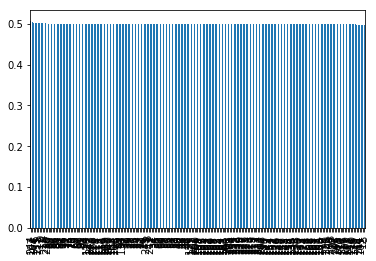

In [ ]:
roc_values.plot.bar()

In [ ]:
sel = roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [ ]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

### Build the Model and compare the performance 

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy on test set:  0.95275
Wall time: 891 ms


In [ ]:
X_train_roc.shape

(16000, 11)

In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set:  0.9585
Wall time: 1.49 s


### Feature Selection using RMSE in Regression 

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [ ]:
mse

[76.38674157646072,
 84.66034377707906,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731934,
 78.30831374720842,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [ ]:
mse = pd.Series(mse, index = X_train.columns)
mse.sort_values(ascending=False, inplace = True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

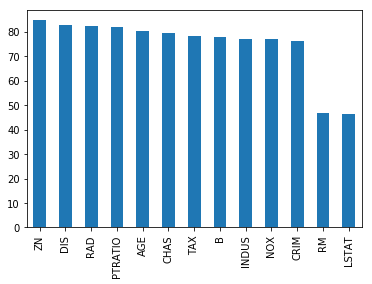

In [ ]:
mse.plot.bar()

In [ ]:
X_train_2 = X_train[['RM', 'LSTAT']]
X_test_2 = X_test[['RM', 'LSTAT']]

In [ ]:
%%time
model = LinearRegression()
model.fit(X_train_2, y_train)
y_pred = model.predict(X_test_2)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score:  0.5409084827186417
rmse:  6.114172522817781
sd of house price:  9.188011545278203
Wall time: 3 ms


In [ ]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score:  0.5892223849182492
rmse:  5.783509315085146
sd of house price:  9.188011545278203
Wall time: 4 ms


## Feature Selection Based on Mutual Information (Entropy) Gain for Classification and Regression 

### What is Mutual Information 

The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for classification problems.

Mutual information (MI) is a measure of the amount of information between two random variables is symmetric and non-negative, and it could be zero if and only if the variables are independent. 

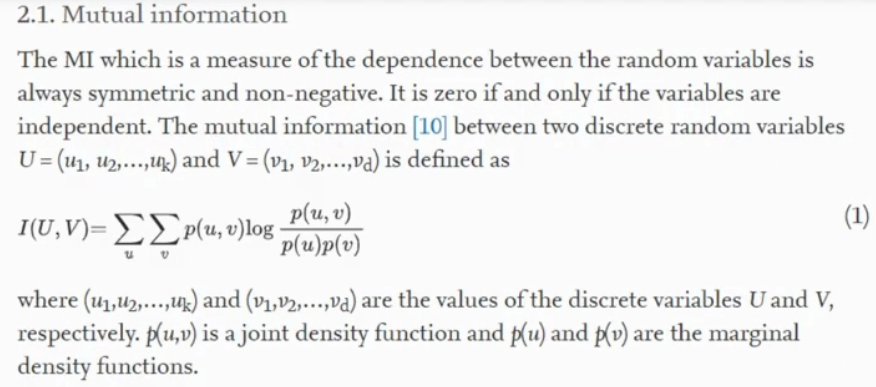

It is NP hard optimization problem in computer science branch. The best approach which we in general follow is greedy solution for feature selection. Those approaches are step-wise forward feature selection or step-wise backward feature selection. 

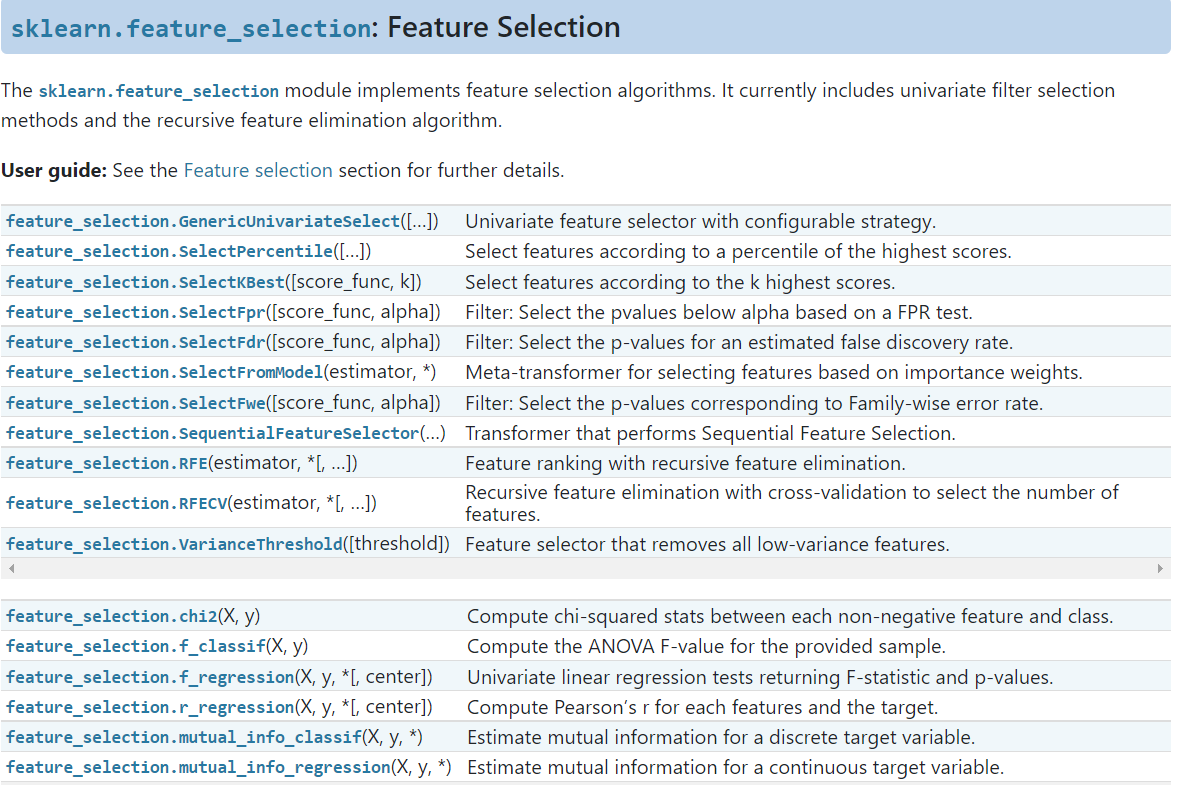

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [ ]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove constant, quasi constant, and duplicate features 

In [ ]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

18

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

In [ ]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Calculate the MI 

In [ ]:
mi = mutual_info_classif(X_train_unique, y_train)

In [ ]:
len(mi)

227

In [ ]:
mi

array([2.68003208e-03, 2.34042929e-03, 1.15087441e-02, 0.00000000e+00,
       2.86918620e-04, 2.78306351e-03, 2.32310495e-03, 1.21676256e-03,
       0.00000000e+00, 5.58464658e-04, 0.00000000e+00, 0.00000000e+00,
       1.37537844e-03, 0.00000000e+00, 1.03578561e-03, 0.00000000e+00,
       5.86610296e-04, 1.12446180e-03, 0.00000000e+00, 1.20041192e-03,
       7.61191860e-04, 3.74014917e-03, 1.09857326e-02, 0.00000000e+00,
       0.00000000e+00, 8.11951690e-04, 2.57920620e-03, 2.38551976e-03,
       1.76414654e-03, 0.00000000e+00, 1.50903586e-03, 2.47960900e-03,
       0.00000000e+00, 3.47573294e-04, 2.18302853e-03, 0.00000000e+00,
       5.04068209e-04, 4.33083917e-03, 1.29410049e-02, 0.00000000e+00,
       0.00000000e+00, 3.72385417e-03, 4.17224927e-03, 1.40639203e-03,
       3.15111906e-03, 1.04621088e-02, 4.73148088e-03, 6.88024127e-03,
       0.00000000e+00, 1.62220502e-03, 1.60385470e-03, 4.04120909e-04,
       1.68315841e-03, 1.72029101e-03, 2.61153119e-03, 3.27901726e-03,
      

In [ ]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [ ]:
mi.sort_values(ascending=False, inplace = True)

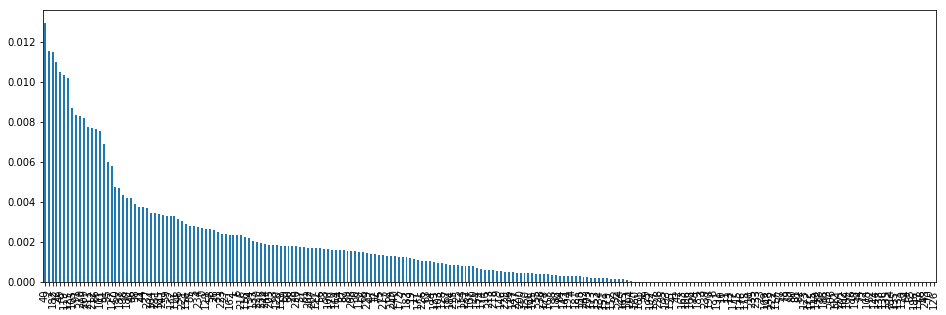

In [ ]:
mi.plot.bar(figsize = (16,5))

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  26,  30,  40,  46,  49,  51,  86,  91, 101, 105, 119,
            125, 127, 160, 168, 182, 209, 210, 211, 212, 229],
           dtype='int64')

In [ ]:
len(X_train_unique.columns[sel.get_support()])

23

In [ ]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection.univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x000001E964B30268>, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature scores, None if `score_func` returned only sc

In [ ]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [ ]:
X_train_mi.shape

(16000, 23)

### Build the model and compare the performance

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.958
Wall time: 571 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 1.46 s


In [ ]:
(1.46-0.57)*100/1.46


60.95890410958904

### Mutual Information Gain in Regression 

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

In [ ]:
mi

LSTAT      0.679664
RM         0.560279
INDUS      0.514883
PTRATIO    0.476028
NOX        0.453753
TAX        0.388035
CRIM       0.355854
AGE        0.342615
DIS        0.319469
ZN         0.202716
RAD        0.188252
B          0.147638
CHAS       0.028292
dtype: float64

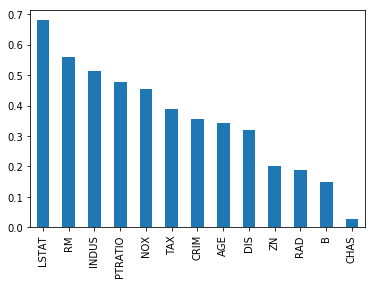

In [ ]:
mi.plot.bar()

In [ ]:
sel = SelectKBest(mutual_info_regression, k = 9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
r2_score(y_test, y_predict)

0.5892223849182492

In [ ]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085146

In [ ]:
np.std(y)

9.188011545278203

In [ ]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [ ]:
X_test_9 = sel.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_9, y_train)
y_predict = model.predict(X_test_9)
print('r2_score')
r2_score(y_test, y_predict)


r2_score


0.5317127606961576

In [ ]:
print('rmse')
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


6.175103151293747

## Feature Selection Based on Univariate (ANOVA) Test for Classification

### What is Univariate (ANOVA) Test 

The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for classification problems.

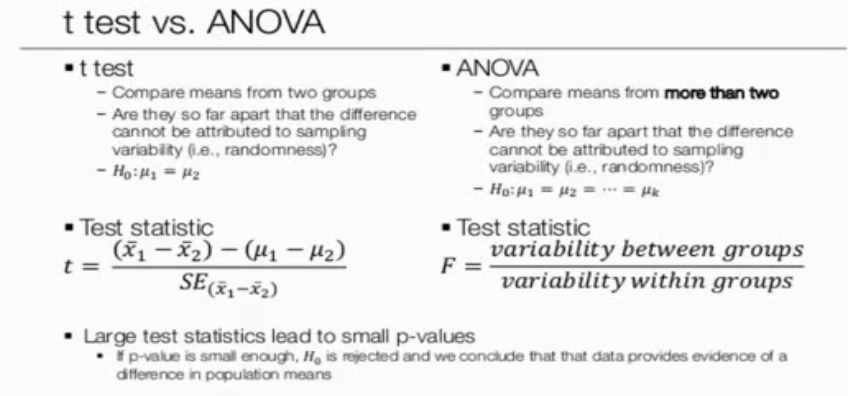

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. 

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample.

The F-test is used for comparing the factors of the total deviation. For example, in one-way, or single-factor ANOVA, statistical significance is tested for by comparing the F test statistic

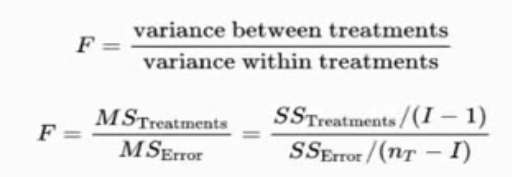

### Classification Problem 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [ ]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove Constant, Quasi Constant, and Correlated Features 

In [ ]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [ ]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

18

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

####  Now do F-Test

In [ ]:
sel = f_classif(X_train_unique, y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [ ]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True, inplace = True)

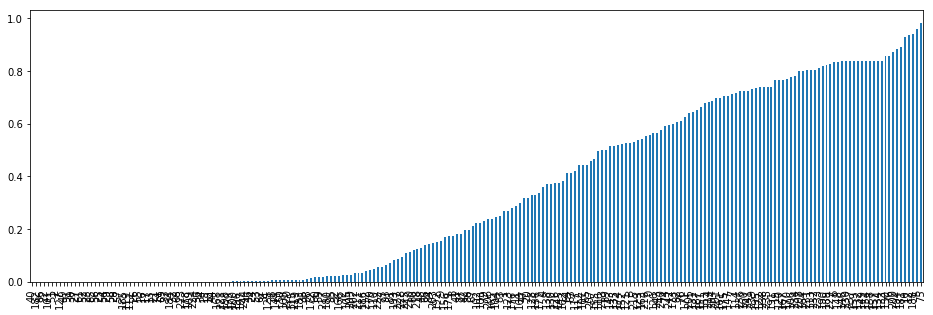

In [ ]:
p_values.plot.bar(figsize = (16, 5))

In [ ]:
p_values = p_values[p_values<0.05]

In [ ]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,  30,  27,  61,
             52,  23,  85,  56,  25,  54,  29,  58,  28,  57, 185, 119, 111,
             26,  55,  16,  17,  13,  21,  14,  69,  33, 184,  32,  68, 223,
            178, 109, 224,  36,  34,  15,  18,  44, 168, 221, 198, 199, 100,
            196, 197, 244,  46,  24,  53,  62,  31, 125,  38, 144,  50, 108,
            220, 115, 219, 183,  35,  98, 172,  60,  59, 217, 180,  95,  92,
            166,  72, 105, 209, 202, 211, 186, 212,  70, 110],
           dtype='int64')

In [ ]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

### Build the classifiers and compare the performance 

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_p, X_test_p, y_train, y_test)

Accuracy:  0.953
Wall time: 814 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9585
Wall time: 1.49 s


## Feature Selection using Fisher Score and Chi2 (χ2) Test | Titanic Dataset 

### What is Fisher Score and Chi2 (χ2) Test

Fisher score is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the Fisher criterion, which leads to a suboptimal subset of features

### Chi Square (χ2) Test

A chi-squared test, also written as χ2 test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution. 

chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.drop(labels = ['age', 'deck'], axis = 1, inplace = True)

In [ ]:
titanic = titanic.dropna()

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()

In [ ]:
data.head()

pclass     sex  sibsp  parch embarked    who  alone
0       3    male      1      0        S    man  False
1       1  female      1      0        C  woman  False
2       3  female      0      0        S  woman   True
3       1  female      1      0        S  woman  False
4       3    male      0      0        S    man   True

In [ ]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [ ]:
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)

In [ ]:
data.head()

pclass  sex  sibsp  parch embarked    who  alone
0       3    0      1      0        S    man  False
1       1    1      1      0        C  woman  False
2       3    1      0      0        S  woman   True
3       1    1      1      0        S  woman  False
4       3    0      0      0        S    man   True

In [ ]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [ ]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [ ]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)

In [ ]:
data.head()

pclass  sex  sibsp  parch  embarked  who  alone
0       3    0      1      0         0    0      0
1       1    1      1      0         1    1      0
2       3    1      0      0         0    1      1
3       1    1      1      0         0    1      0
4       3    0      0      0         0    0      1

### Do F_Score

In [ ]:
X = data.copy()
y = titanic['survived']

In [ ]:
X.shape, y.shape

((889, 7), (889,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
f_score = chi2(X_train, y_train)

In [ ]:
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [ ]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)

In [ ]:
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

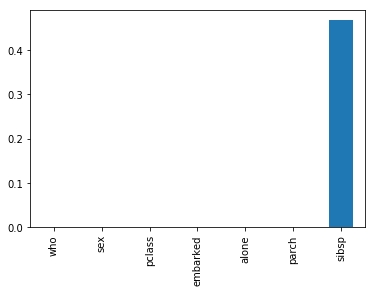

In [ ]:
p_values.plot.bar()

In [ ]:
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.7191011235955056
Wall time: 259 ms


In [ ]:
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]


In [ ]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7415730337078652
Wall time: 262 ms


In [ ]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'embarked']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'embarked']]


In [ ]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7584269662921348
Wall time: 254 ms


In [ ]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'alone']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'alone']]


In [ ]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7528089887640449
Wall time: 258 ms


In [ ]:
X_train_5 = X_train[['who', 'sex', 'pclass', 'embarked', 'alone']]
X_test_5 = X_test[['who', 'sex', 'pclass', 'embarked', 'alone']]

In [ ]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.7528089887640449
Wall time: 257 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7359550561797753
Wall time: 256 ms


# Feature Dimention Reduction Using LDA and PCA with Python | Principal Component Analysis in Feature Selection 

### What is LDA (Linear Discriminant Analysis)? 

The idea behind LDA is simple. Mathematically speaking, we need to find a new feature space to project the data in order to maximize classes separability

Linear Discriminant Analysis is a supervised algorithm as it takes the class label into consideration. It is a way to reduce ‘dimensionality’ while at the same time preserving as much of the class discrimination information as possible.

LDA helps you find the boundaries around clusters of classes. It projects your data points on a line so that your clusters are as separated as possible, with each cluster having a relative (close) distance to a centroid.

So the question arises- how are these clusters are defined and how do we get the reduced feature set in case of LDA?

Basically LDA finds a centroid of each class datapoints. For example with thirteen different features LDA will find the centroid of each of its class using the thirteen different feature dataset. Now on the basis of this, it determines a new dimension which is nothing but an axis which should satisfy two criteria:
1.	Maximize the distance between the centroid of each class.
2.	Minimize the variation (which LDA calls scatter and is represented by s2), within each category.

### What is PCA 

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

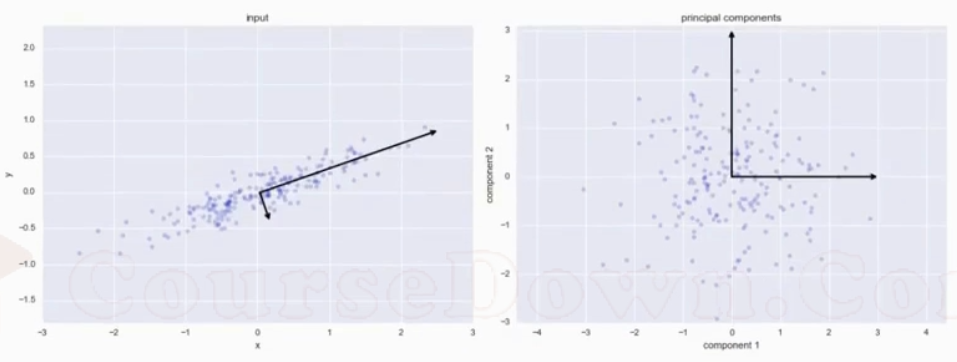

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

## When to use PCA 

Data Visualization: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

Speeding Machine Learning (ML) Algorithm: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

## How to do PCA 

We can calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. The benefit of this approach is that once the projection is calculated, it can be applied to new data again and again quite easily.

When creating the class, the number of components can be specified as a parameter.

The class is first fit on a dataset by calling the fit() function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the transform() function.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [ ]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove Constant, Quasi Constant and Duplicate Features

In [ ]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [ ]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

18

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)

In [ ]:
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

In [ ]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Removal of correlated Feature 

In [ ]:
corrmat = X_train_unique.corr()

In [ ]:
#find correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.70)
print('correlated features: ', len(set(corr_features)) )    

correlated features:  148


In [ ]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 79), (4000, 79))

## Feature Dimention Reduction by LDA or Is it a Classifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_uncorr, y_train)
X_test_lda = lda.transform(X_test_uncorr)

In [ ]:
X_train_lda.shape, X_test_lda.shape

((16000, 1), (4000, 1))

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_lda, X_test_lda, y_train, y_test)

Accuracy on test set: 
0.93025
CPU times: user 3.35 s, sys: 64.3 ms, total: 3.41 s
Wall time: 1.1 s


In [ ]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 3.41 s, sys: 82 ms, total: 3.49 s
Wall time: 1.2 s


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 6.68 s, sys: 143 ms, total: 6.83 s
Wall time: 2.01 s


### Feature Reduction by PCA? 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_uncorr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_pca = pca.transform(X_train_uncorr)
X_test_pca = pca.transform(X_test_uncorr)
X_train_pca.shape, X_test_pca.shape

((16000, 2), (4000, 2))

In [ ]:
%%time
run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.956
CPU times: user 3.06 s, sys: 67.9 ms, total: 3.12 s
Wall time: 999 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 6.75 s, sys: 138 ms, total: 6.89 s
Wall time: 2.13 s


In [ ]:
X_train_uncorr.shape

(16000, 79)

In [ ]:
for component in range(1,30):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(X_train_uncorr)
    X_train_pca = pca.transform(X_train_uncorr)
    X_test_pca = pca.transform(X_test_uncorr)
    print('Selected Components: ', component)
    run_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Components:  1
Accuracy on test set: 
0.92375

Selected Components:  2
Accuracy on test set: 
0.956

Selected Components:  3
Accuracy on test set: 
0.95675

Selected Components:  4
Accuracy on test set: 
0.95825

Selected Components:  5


# Step Forward, Step Backward and Exhaustive Feature Selection | Wrapper Method

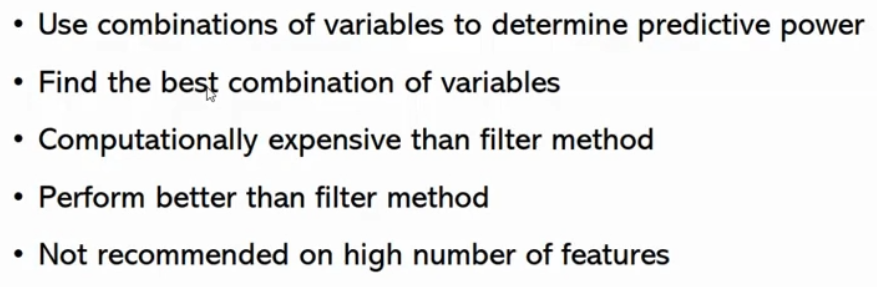

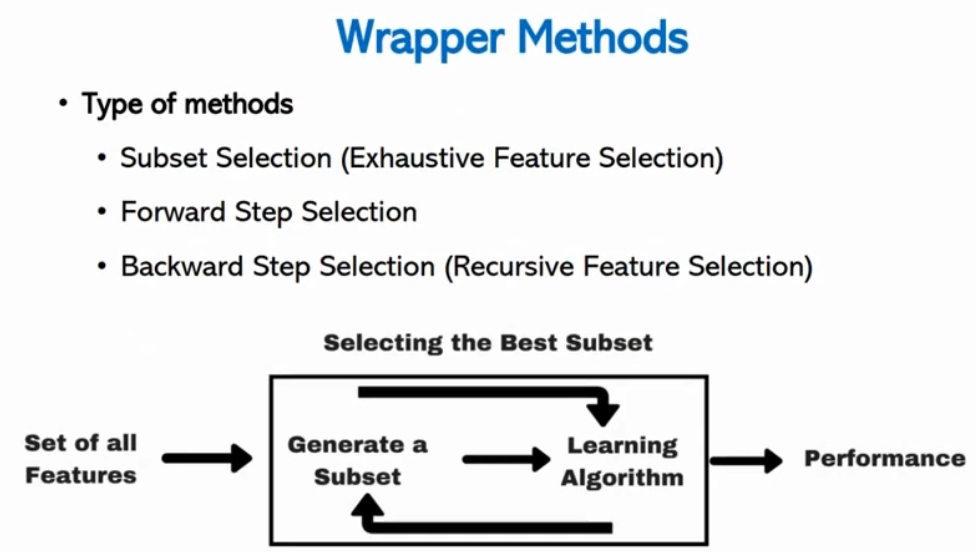

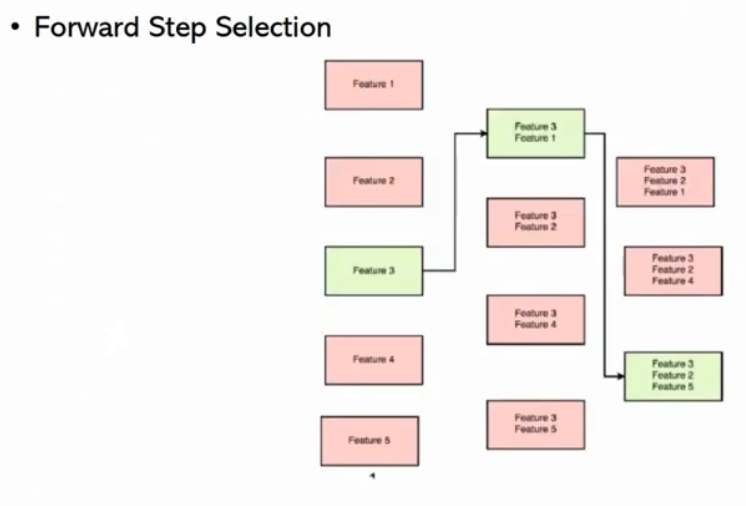

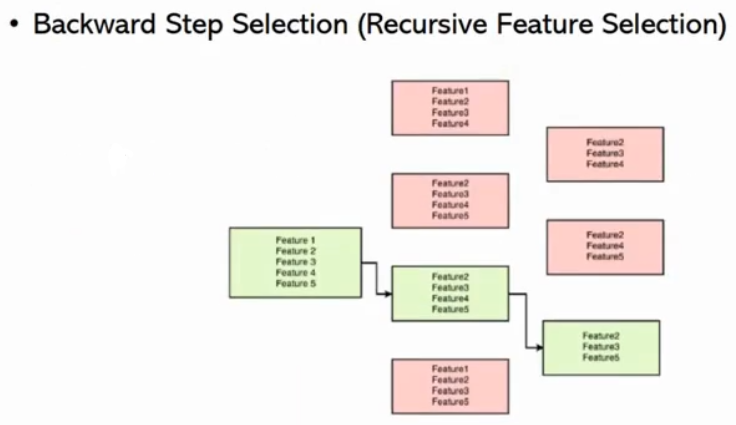

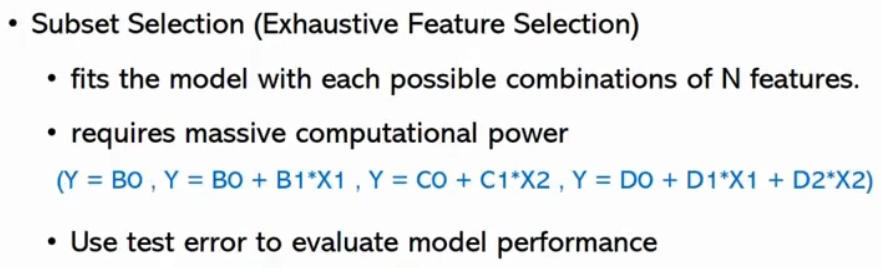

#### Use of mlxtend in Wrapper Method 

In [ ]:
!pip install mlxtend

More Information Available at
http://rasbt.github.io/mlxtend/

#### How it works 

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. 

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached. There are 4 different flavors of SFAs available via the SequentialFeatureSelector:

- Sequential Forward Selection (SFS)
- Sequential Backward Selection (SBS)
- Sequential Forward Floating Selection (SFFS)
- Sequential Backward Floating Selection (SBFS)

#### Step Forward Selection (SFS) 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_wine()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
X = pd.DataFrame(data.data)
y = data.target

In [ ]:
X.columns = data.feature_names
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [ ]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

### Step Forward Feature Selection (SFS) 

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s finished

[2019-08-24 19:00:34] Features: 1/7 -- score: 0.7744132788250435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s finished

[2019-08-24 19:00:37] Features: 2/7 -- score: 0.965233931410402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.0s finished

[2019-08-24 19:00:40] Features: 3/7 -- score: 0.9861003861003861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished

[2019-08-24 19:00:44] Features: 4/7 -- score: 0.9793543

In [ ]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'flavanoids',
 'color_intensity',
 'od280/od315_of_diluted_wines')

In [ ]:
sfs.k_feature_idx_

(0, 2, 3, 4, 6, 9, 11)

In [ ]:
sfs.k_score_

0.9932432432432432

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

avg_score   ci_bound                                          cv_scores  \
1  0.774413  0.0559516  [0.7567567567567568, 0.8333333333333334, 0.742...   
2  0.965234  0.0468773  [0.918918918918919, 1.0, 0.9714285714285714, 0...   
3    0.9861   0.022298  [0.972972972972973, 1.0, 0.9714285714285714, 1.0]   
4  0.979354  0.0368329  [0.972972972972973, 0.9444444444444444, 1.0, 1.0]   
5  0.993243  0.0187598                 [0.972972972972973, 1.0, 1.0, 1.0]   
6  0.986299  0.0219669  [0.972972972972973, 0.9722222222222222, 1.0, 1.0]   
7  0.993243  0.0187598                 [0.972972972972973, 1.0, 1.0, 1.0]   

              feature_idx                                      feature_names  \
1                    (6,)                                      (flavanoids,)   
2                  (6, 9)                      (flavanoids, color_intensity)   
3               (4, 6, 9)           (magnesium, flavanoids, color_intensity)   
4            (0, 4, 6, 9)  (alcohol, magnesium, flavanoids, color_intensity)   
5        (0, 4, 6, 9, 11)  (alcohol, magnesium, flavanoids, color_intensi...   
6     (0, 2, 4, 6, 9, 11)  (alcohol, ash, magnesium, flavanoids, color_in...   
7  (0, 2, 3, 4, 6, 9, 11)  (alcohol, ash, alcalinity_of_ash, magnesium, f...   

     std_dev     std_err  
1  0.0349047   0.0201522  
2  0.0292438   0.0168839  
3  0.0139103  0.00803114  
4  0.0229778   0.0132662  
5   0.011703  0.00675676  
6  0.0137038  0.00791188  
7   0.011703  0.00675676

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s finished

[2019-08-24 19:05:14] Features: 1/8 -- score: 0.7744132788250435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s finished

[2019-08-24 19:05:17] Features: 2/8 -- score: 0.965233931410402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.0s finished

[2019-08-24 19:05:21] Features: 3/8 -- score: 0.9861003861003861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished

[2019-08-24 19:05:24] Features: 4/8 -- score: 0.9793543

In [ ]:
sfs.k_score_

0.9932432432432432

In [ ]:
sfs.k_feature_names_

('alcohol',
 'magnesium',
 'flavanoids',
 'color_intensity',
 'od280/od315_of_diluted_wines')

### Step Backward Selection (SBS) 

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s finished

[2019-08-24 19:08:35] Features: 12/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s finished

[2019-08-24 19:08:38] Features: 11/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.0s finished

[2019-08-24 19:08:41] Features: 10/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished

[2019-08-24 19:08:44] Features: 9/1 -- score: 0.993

In [ ]:
sbs = sfs

In [ ]:
sbs.k_score_

0.9932432432432432

In [ ]:
sbs.k_feature_names_

('alcohol',
 'malic_acid',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'color_intensity')

### Exhaustive Feature Selection (EFS) 

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 2002/2002

C(13, 4) + C(13, 5) = 715 + 1287

In [ ]:
715 + 1287

2002

In [ ]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [ ]:
efs.best_score_

1.0

In [ ]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [ ]:
efs.best_idx_

(0, 1, 2, 3)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


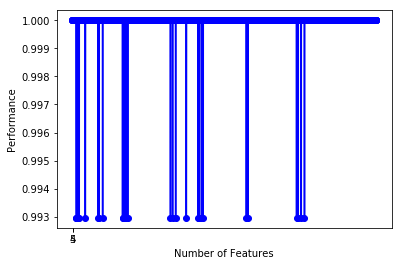

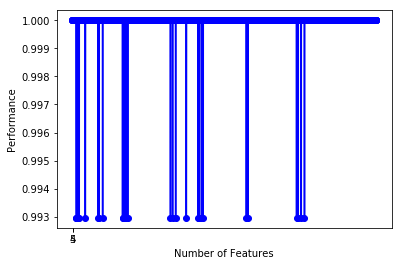

In [ ]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')

# Use of Linear and Logistic Regression Coefficients with Lasso (L1) and Ridge (L2) Regularization for Feature Selection in Machine Learning 

## Linear Regression

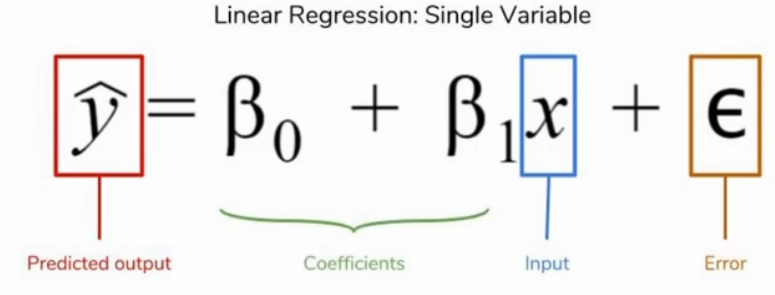

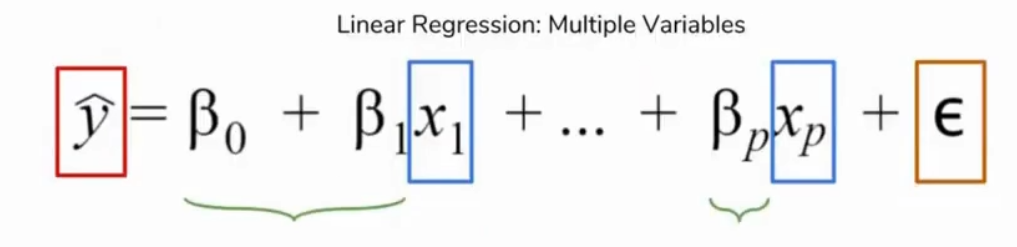

#### Basic Assumptions 

- Linear relationship with the target y
- Feature space X should have gaussian distribution
- Features are not correlated with other
- Features are in same scale i.e. have same variance

## Lasso (L1) and Ridge (L2) Regularization 

Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.

- L1 regularization (also called Lasso)
- L2 regularization (also called Ridge)
- L1/L2 regularization (also called Elastic net)

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

## What is Lasso Regularisation 

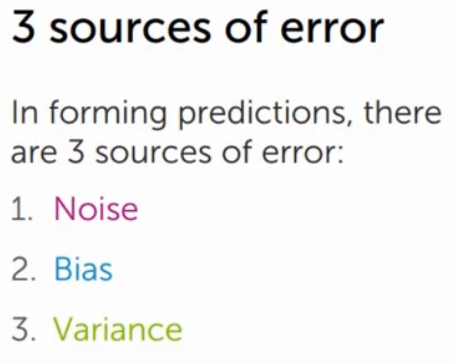

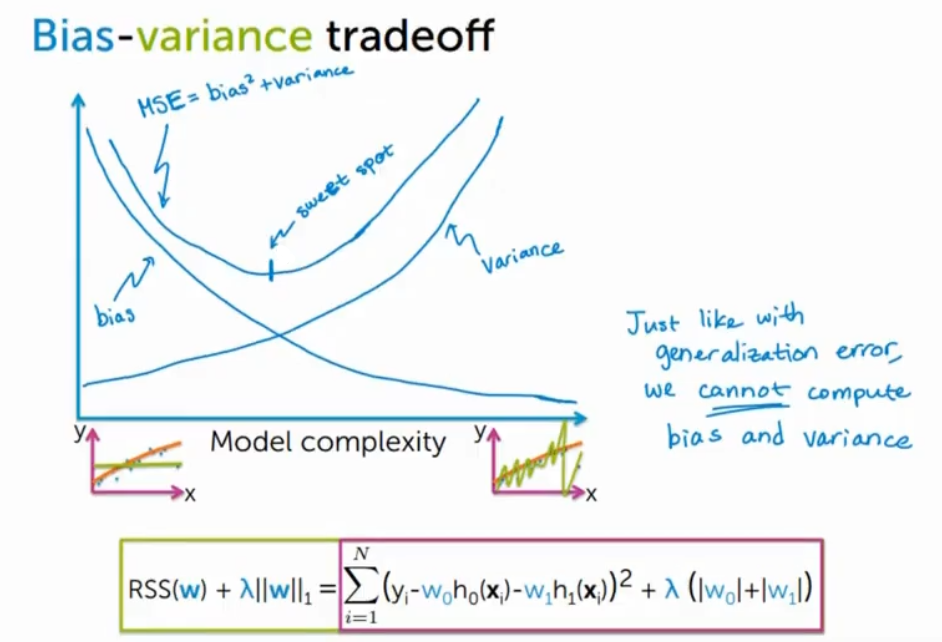

The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients.

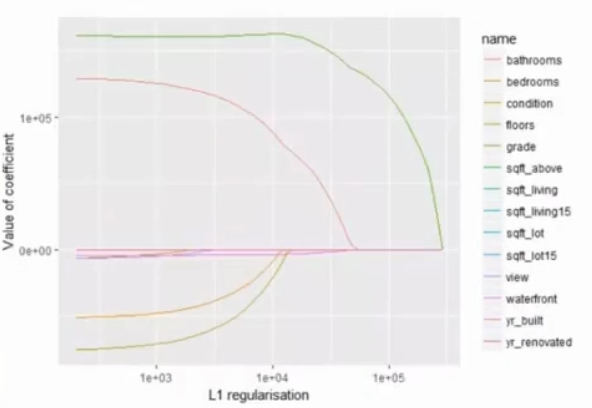

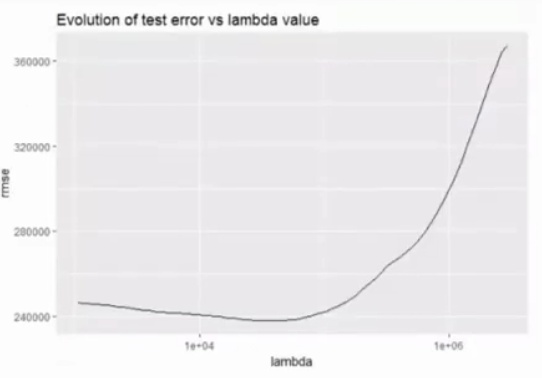

#### How to choose Lambda

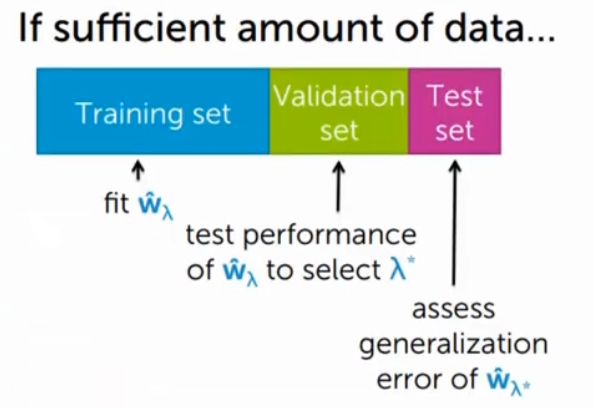

### What is Ridge Regularisation

The L2 regularization adds a penalty equal to the sum of the squared value of the coefficients.

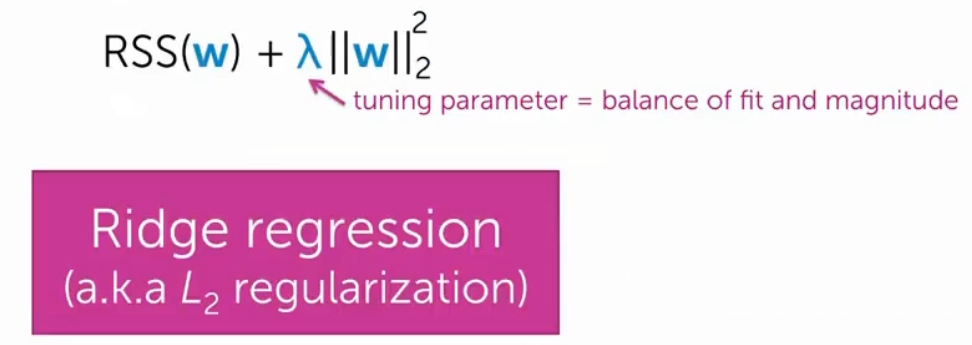

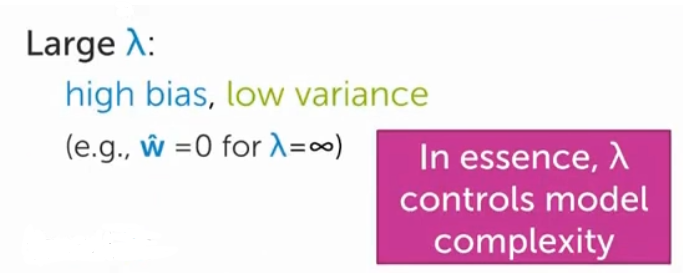

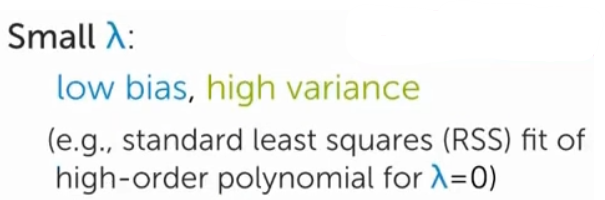

The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust) the coefficients are.

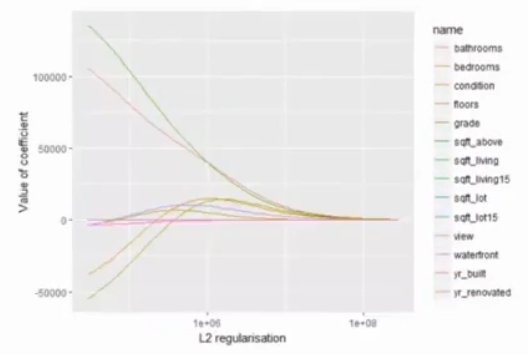

## Difference between L1 and L2 regularization

#### L1 Regularization

- L1 penalizes sum of absolute value of weights.
- L1 has a sparse solution
- L1 has multiple solutions
- L1 has built in feature selection
- L1 is robust to outliers
- L1 generates model that are simple and interpretable but cannot learn complex patterns

#### L2 Regularization 

- L2 regularization penalizes sum of square weights.
- L2 has a non sparse solution
- L2 has one solution
- L2 has no feature selection
- L2 is not robust to outliers
- L2 gives better prediction when output variable is a function of all input features
- L2 regularization is able to learn complex data patterns

## Load the dataset 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.drop(labels = ['age', 'deck'], axis = 1, inplace = True)

In [ ]:
titanic = titanic.dropna()

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()

In [ ]:
data.head()

pclass     sex  sibsp  parch embarked    who  alone
0       3    male      1      0        S    man  False
1       1  female      1      0        C  woman  False
2       3  female      0      0        S  woman   True
3       1  female      1      0        S  woman  False
4       3    male      0      0        S    man   True

In [ ]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [ ]:
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)

In [ ]:
data.head()

pclass  sex  sibsp  parch embarked    who  alone
0       3    0      1      0        S    man  False
1       1    1      1      0        C  woman  False
2       3    1      0      0        S  woman   True
3       1    1      1      0        S  woman  False
4       3    0      0      0        S    man   True

In [ ]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [ ]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [ ]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)

In [ ]:
data.head()

pclass  sex  sibsp  parch  embarked  who  alone
0       3    0      1      0         0    0      0
1       1    1      1      0         1    1      0
2       3    1      0      0         0    1      1
3       1    1      1      0         0    1      0
4       3    0      0      0         0    0      1

In [ ]:
X = data.copy()
y = titanic['survived']

In [ ]:
X.shape, y.shape

((889, 7), (889,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

### Estimation of coefficients of Linear Regression  

In [ ]:
sel = SelectFromModel(LinearRegression())

In [ ]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sel.get_support()

array([ True,  True, False, False, False,  True, False])

In [ ]:
sel.estimator_.coef_

array([-0.13750402,  0.26606466, -0.07470416, -0.0668525 ,  0.04793674,
        0.23857799, -0.12929595])

In [ ]:
mean = np.mean(np.abs(sel.estimator_.coef_))

In [ ]:
mean

0.13727657291370804

In [ ]:
np.abs(sel.estimator_.coef_)

array([0.13750402, 0.26606466, 0.07470416, 0.0668525 , 0.04793674,
       0.23857799, 0.12929595])

In [ ]:
features = X_train.columns[sel.get_support()]
features

Index(['pclass', 'sex', 'who'], dtype='object')

In [ ]:
X_train_reg = sel.transform(X_train)
X_test_reg = sel.transform(X_test)

In [ ]:
X_test_reg.shape

(267, 3)

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_reg, X_test_reg, y_train, y_test)

Accuracy:  0.8239700374531835
Wall time: 250 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.8239700374531835
Wall time: 252 ms


In [ ]:
X_train.shape

(622, 7)

### Logistic Regression Coefficient with L1 Regularization 

In [ ]:
sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 0.05, solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True, False, False,  True, False])

In [ ]:
sel.estimator_.coef_

array([[-0.54045394,  0.78039608, -0.14081954,  0.        ,  0.        ,
         0.94106713,  0.        ]])

In [ ]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)

In [ ]:
%%time
run_randomForest(X_train_l1, X_test_l1, y_train, y_test)

Accuracy:  0.8277153558052435
Wall time: 251 ms


## L2 Regularization 

In [ ]:
sel = SelectFromModel(LogisticRegression(penalty = 'l2', C = 0.05, solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True, False, False, False,  True, False])

In [ ]:
sel.estimator_.coef_

array([[-0.55749685,  0.85692344, -0.30436065, -0.11841967,  0.2435823 ,
         1.00124155, -0.29875898]])

In [ ]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)

In [ ]:
%%time
run_randomForest(X_train_l1, X_test_l1, y_train, y_test)

Accuracy:  0.8239700374531835
Wall time: 250 ms


## Recursive Feature Elimination (RFE) by Using Tree Based and Gradient Based Estimators 

Scikit Learn does most of the heavy lifting just import RFE from sklearn.feature_selection and pass any classifier model to the RFE() method with the number of features to select. Using familiar Scikit Learn syntax, the .fit() method must then be called.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X = pd.DataFrame(data = data.data, columns=data.feature_names)
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [ ]:
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

### Feature selection by feature importance of random forest classifier 

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [ ]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
features = X_train.columns[sel.get_support()]

In [ ]:
features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

In [ ]:
len(features)

10

In [ ]:
np.mean(sel.estimator_.feature_importances_)

0.03333333333333333

In [ ]:
sel.estimator_.feature_importances_

array([0.03699612, 0.01561296, 0.06016409, 0.0371452 , 0.0063401 ,
       0.00965994, 0.0798662 , 0.08669071, 0.00474992, 0.00417092,
       0.02407355, 0.00548033, 0.01254423, 0.03880038, 0.00379521,
       0.00435162, 0.00452503, 0.00556905, 0.00610635, 0.00528878,
       0.09556258, 0.01859305, 0.17205401, 0.05065305, 0.00943096,
       0.01565491, 0.02443166, 0.14202709, 0.00964898, 0.01001304])

In [ ]:
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy:  0.9473684210526315
Wall time: 250 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9649122807017544
Wall time: 256 ms


### Recursive Feature Elimination (RFE) 

In [ ]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [ ]:
sel.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [ ]:
features = X_train.columns[sel.get_support()]

In [ ]:
features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

In [ ]:
len(features)

15

In [ ]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [ ]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9736842105263158
Wall time: 251 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9649122807017544
Wall time: 254 ms


### Feature selection by GradientBoost Tree Importance 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 12)
sel.fit(X_train, y_train)

RFE(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
  n_features_to_select=12, step=1, verbose=0)

In [ ]:
sel.get_support()

array([False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False, False])

In [ ]:
features = X_train.columns[sel.get_support()]

In [ ]:
features

Index(['mean texture', 'mean smoothness', 'mean concave points',
       'mean symmetry', 'area error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

In [ ]:
len(features)

12

In [ ]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [ ]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9736842105263158
Wall time: 253 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9649122807017544
Wall time: 253 ms


In [ ]:
for index in range(1, 31):
    sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

Selected Feature:  1
Accuracy:  0.8771929824561403

Selected Feature:  2
Accuracy:  0.9035087719298246

Selected Feature:  3
Accuracy:  0.9649122807017544

Selected Feature:  4
Accuracy:  0.9736842105263158

Selected Feature:  5
Accuracy:  0.9649122807017544

Selected Feature:  6
Accuracy:  0.9912280701754386

Selected Feature:  7
Accuracy:  0.9736842105263158

Selected Feature:  8
Accuracy:  0.9649122807017544

Selected Feature:  9
Accuracy:  0.9736842105263158

Selected Feature:  10
Accuracy:  0.956140350877193

Selected Feature:  11
Accuracy:  0.956140350877193

Selected Feature:  12
Accuracy:  0.9736842105263158

Selected Feature:  13
Accuracy:  0.956140350877193

Selected Feature:  14
Accuracy:  0.9649122807017544

Selected Feature:  15
Accuracy:  0.9649122807017544

Selected Feature:  16
Accuracy:  0.9824561403508771

Selected Feature:  17
Accuracy:  0.9649122807017544

Selected Feature:  18
Accuracy:  0.9736842105263158

Selected Feature:  19
Accuracy:  0.9649122807017544

Selec

In [ ]:
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 6)
sel.fit(X_train, y_train)
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
print('Selected Feature: ', 6)
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
print()

Selected Feature:  6
Accuracy:  0.9912280701754386



In [ ]:
features = X_train.columns[sel.get_support()]
features

Index(['mean concave points', 'area error', 'worst texture', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

In [ ]:
for index in range(1, 31):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

Selected Feature:  1
Accuracy:  0.8947368421052632

Selected Feature:  2
Accuracy:  0.9298245614035088

Selected Feature:  3
Accuracy:  0.9473684210526315

Selected Feature:  4
Accuracy:  0.9649122807017544

Selected Feature:  5
Accuracy:  0.9649122807017544

Selected Feature:  6
Accuracy:  0.956140350877193

Selected Feature:  7
Accuracy:  0.956140350877193

Selected Feature:  8
Accuracy:  0.9649122807017544

Selected Feature:  9
Accuracy:  0.9736842105263158

Selected Feature:  10
Accuracy:  0.9736842105263158

Selected Feature:  11
Accuracy:  0.9649122807017544

Selected Feature:  12
Accuracy:  0.9736842105263158

Selected Feature:  13
Accuracy:  0.9649122807017544

Selected Feature:  14
Accuracy:  0.9736842105263158

Selected Feature:  15
Accuracy:  0.9736842105263158

Selected Feature:  16
Accuracy:  0.9736842105263158

Selected Feature:  17
Accuracy:  0.9824561403508771

Selected Feature:  18
Accuracy:  0.9649122807017544

Selected Feature:  19
Accuracy:  0.9649122807017544

Sele